In [1]:
import pandas as pd

# Load datasets
customer_data = pd.read_csv(r"C:\Users\krish\Downloads\client_data (1).csv")  # Load customer data
pricing_data = pd.read_csv(r"C:\Users\krish\Downloads\price_data (1).csv")  # Load pricing data

# Merge both datasets using 'Customer_ID'
df = customer_data.merge(pricing_data, on="id", how="left")

# Display first few rows after merging
print(df.head())


                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1         0         54946                0  2013-06-15  2016-06-15   
2         0         54946                0  2013-06-15  2016-06-15   
3         0         54946                0  2013-06-15  2016-06-15   
4         0         54946                0  2013-06-15  2016-06-15   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23                0.0  ...   
1      2015-11-01   2015

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load data (adjust path if needed)
df = pd.read_csv("C:/Users/krish/Downloads/client_data (1).csv")

# Convert date_end to datetime format
df["date_end"] = pd.to_datetime(df["date_end"])

# Define today's date
today = datetime.today()

# Create Churn column based on conditions
df["churn"] = np.where(
    (df["cons_last_month"] == 0) |  # No usage in last month
    (df["date_end"] < today) |  # Contract expired
    (df["forecast_cons_12m"] < df["cons_12m"] * 0.5),  # Forecasted usage dropped by more than 50%
    1,  # Churned
    0   # Active
)

# Display the first few rows with churn status
print(df[["id", "cons_last_month", "date_end", "forecast_cons_12m", "cons_12m", "churn"]].head())


                                 id  cons_last_month   date_end  \
0  24011ae4ebbe3035111d65fa7c15bc57                0 2016-06-15   
1  d29c2c54acc38ff3c0614d0a653813dd                0 2016-08-30   
2  764c75f661154dac3a6c254cd082ea7d                0 2016-04-16   
3  bba03439a292a1e166f80264c16191cb                0 2016-03-30   
4  149d57cf92fc41cf94415803a877cb4b              526 2016-03-07   

   forecast_cons_12m  cons_12m  churn  
0               0.00         0      1  
1             189.95      4660      1  
2              47.96       544      1  
3             240.04      1584      1  
4             445.75      4425      1  


In [3]:
# Churn Rate Calculation
churn_rate = df["churn"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")


Overall Churn Rate: 100.00%


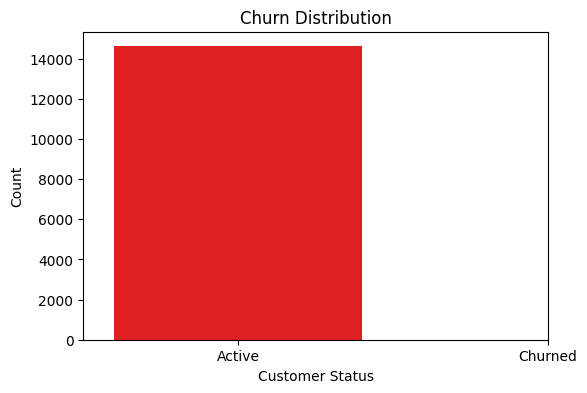

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert churn column to categorical for better visualization
df["churn"] = df["churn"].astype(str)  # Ensure it's treated as a category

# Plot Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="churn", hue="churn", palette={ "0": "green", "1": "red" }, legend=False)
plt.xticks([0, 1], ["Active", "Churned"])
plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Churn Distribution")
plt.show()


In [5]:
# Check column data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())


id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                                object
date_end                          datetime64[ns]
date_modif_prod                           object
date_renewal                              object
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [6]:
# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include=["object"]).columns:
   df[col]= df[col].fillna(df[col].mode()[0])

# Verify missing values are handled
print(df.isnull().sum())


id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64


In [7]:
print(df.dtypes)
print(df.describe(include="object"))  # Shows mode, unique values, etc.
print(df.describe())  # Only for numerical columns


id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                                object
date_end                          datetime64[ns]
date_modif_prod                           object
date_renewal                              object
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=30)
plt.show()
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.show()
for col in df.select_dtypes(include="object"):  
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df[col],palette="viridis",legend=False)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:

from datetime import datetime

# Convert date columns to datetime format
date_cols = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Create new features
df["customer_tenure"] = (datetime.today() - df["date_activ"]).dt.days  # Days since activation
df["days_since_modif"] = (datetime.today() - df["date_modif_prod"]).dt.days  # Last modification
df["days_since_renewal"] = (datetime.today() - df["date_renewal"]).dt.days  # Last renewal
df["total_energy_consumption"] = df["cons_12m"] + df["cons_gas_12m"]  # Total energy usage
df["recent_usage_ratio"] = df["cons_last_month"] / (df["cons_12m"] + 1)  # Avoid division by zero
df["price_diff_peak_off"] = df["forecast_price_energy_peak"] - df["forecast_price_energy_off_peak"]
df["expected_annual_cost"] = df["forecast_cons_year"] * df["forecast_price_energy_peak"]
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["channel_sales", "origin_up"]
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())
